In [ ]:
from keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/test'

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilenet_v2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilenet_v2.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/train/*')

In [ ]:
folders

['/content/drive/MyDrive/train/Pneumonia',
 '/content/drive/MyDrive/train/Covid-19',
 '/content/drive/MyDrive/train/No_findings']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilenet_v2.output)


In [ ]:
len(folders)

3

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet_v2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = image.ImageDataGenerator(
rescale=1./255,
shear_range= 0.2,
zoom_range= 0.2,
horizontal_flip = True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'categorical')

Found 967 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Covid-19': 0, 'No_findings': 1, 'Pneumonia': 2}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
        '/content/drive/MyDrive/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 158 images belonging to 3 classes.


In [ ]:
hist = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=50,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/50
31/31 [==============================] - 518s 16s/step - loss: 5.3679 - accuracy: 0.6474 - val_loss: 5.5165 - val_accuracy: 0.5570
Epoch 2/50
31/31 [==============================] - 33s 1s/step - loss: 1.9726 - accuracy: 0.8139 - val_loss: 2.5391 - val_accuracy: 0.6709
Epoch 3/50
31/31 [==============================] - 34s 1s/step - loss: 1.2109 - accuracy: 0.8376 - val_loss: 2.1483 - val_accuracy: 0.7215
Epoch 4/50
31/31 [==============================] - 33s 1s/step - loss: 0.6206 - accuracy: 0.8780 - val_loss: 4.1731 - val_accuracy: 0.6519
Epoch 5/50
31/31 [==============================] - 33s 1s/step - loss: 0.6173 - accuracy: 0.8976 - val_loss: 2.9421 - val_accuracy: 0.6709
Epoch 6/50
31/31 [==============================] - 33s 1s/step - loss: 0.8120 - accuracy: 0.8749 - val_loss: 3.5351 - val_accuracy: 0.6709
Epoch 7/50
31/31 [==============================] - 33s 1s/step - loss: 1.0068 - accuracy: 0.8542 - val_loss: 2.5278 - val_accuracy: 0.7405
Epoch 8/50
31/31 [

In [ ]:
import matplotlib.pyplot as plt

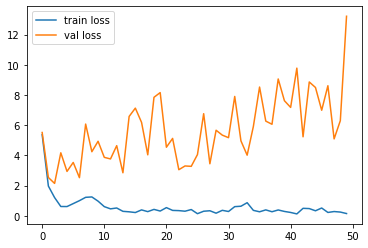

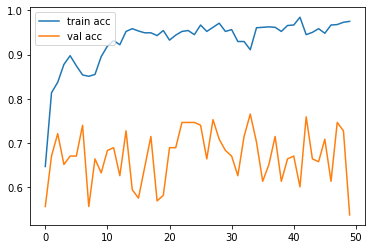

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_mobilenet_v2.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(validation_generator)

In [ ]:
y_pred

array([[2.55281552e-26, 1.59142544e-30, 1.00000000e+00],
       [8.83668477e-14, 1.00000000e+00, 6.18178353e-09],
       [1.71513928e-36, 3.02657399e-19, 1.00000000e+00],
       [7.85476994e-04, 3.02271202e-32, 9.99214530e-01],
       [0.00000000e+00, 1.30559856e-04, 9.99869466e-01],
       [0.00000000e+00, 9.98689592e-01, 1.31036923e-03],
       [5.57151161e-08, 1.12843939e-20, 1.00000000e+00],
       [1.37098136e-34, 1.43760724e-22, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.11914367e-20],
       [2.34586378e-06, 1.80332851e-25, 9.99997616e-01],
       [2.52525729e-13, 1.93162970e-21, 1.00000000e+00],
       [1.56939505e-17, 1.33230362e-18, 1.00000000e+00],
       [1.13086353e-31, 8.21419857e-25, 1.00000000e+00],
       [5.51463995e-20, 7.52178681e-29, 1.00000000e+00],
       [1.36888349e-15, 0.00000000e+00, 1.00000000e+00],
       [2.59855436e-24, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.97762563e-35, 5.81404

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 0])

In [ ]:
label = validation_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred,label)
cf

array([[12,  8,  5],
       [ 6,  6,  4],
       [50, 26, 41]])

In [ ]:
import pandas as pd
exp_series = pd.Series(label)
pred_series = pd.Series(y_pred)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
Actual,,,,
0,12,6,50,68
1,8,6,26,40
2,5,4,41,50
All,25,16,117,158


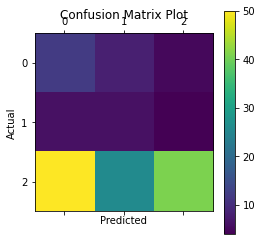

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

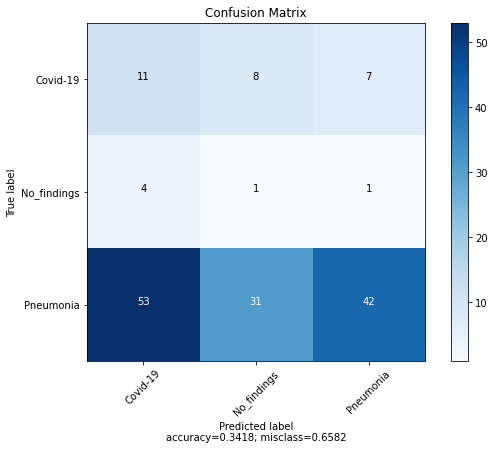

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 11,  8,   7],
                                              [  4,  1,  1],
                                              [  53,  31, 42]]), 
                      normalize    = False,
                      target_names = ['Covid-19', 'No_findings', 'Pneumonia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,label)

array([[12,  8,  5],
       [ 6,  6,  4],
       [50, 26, 41]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,label)

0.37341772151898733

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_pred, label, average=None)

array([0.48      , 0.375     , 0.35042735])

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_pred, label, average=None)

array([0.17647059, 0.15      , 0.82      ])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_pred, label, average=None)

array([0.25806452, 0.21428571, 0.49101796])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, label))

              precision    recall  f1-score   support

           0       0.18      0.48      0.26        25
           1       0.15      0.38      0.21        16
           2       0.82      0.35      0.49       117

    accuracy                           0.37       158
   macro avg       0.38      0.40      0.32       158
weighted avg       0.65      0.37      0.43       158



In [ ]:
from sklearn.model_selection import train_test_split

y_train, y_test = train_test_split(test_size=0.30, random_state=1, stratify=y)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

NameError: ignored